# Visual Analytics with Tableau

***

## Import Libraries

In [1]:
import numpy as np
from numpy import count_nonzero
from numpy import median
from numpy import mean
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import random

import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols

import datetime
from datetime import datetime, timedelta

#import os
#import zipfile
import scipy.stats

# import pandas_profiling
# from pandas_profiling import ProfileReport


%matplotlib inline
#sets the default autosave frequency in seconds
%autosave 60 
sns.set_style('dark')
sns.set(font_scale=1.2)

plt.rc('axes', titlesize=9)
plt.rc('axes', labelsize=14)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)

import warnings
warnings.filterwarnings('ignore')

#Webscraping
#import requests
#from bs4 import BeautifulSoup

# Use Folium library to plot values on a map.
#import folium

# Use Feature-Engine library
#import feature_engine
#import feature_engine.missing_data_imputers as mdi
#from feature_engine.outlier_removers import Winsorizer
#from feature_engine import categorical_encoders as ce
#from feature_engine.discretisation import EqualWidthDiscretiser, EqualFrequencyDiscretiser, DecisionTreeDiscretiser
#from feature_engine.encoding import OrdinalEncoder

pd.set_option('display.max_columns',None)
#pd.set_option('display.max_rows',None)
pd.set_option('display.width', 1000)
pd.set_option('display.float_format','{:.2f}'.format)

random.seed(0)
np.random.seed(0)
np.set_printoptions(suppress=True)

Autosaving every 60 seconds


## Peer-graded Assignment: Customer Scatterplot

Your company has tasked you with analyzing
your customer’s purchases and how much the company is profiting from each
customer. Your task is to create a scatter plot showing Customer Sales versus Customer
Profit. 

## Exploratory Data Analysis

In [2]:
df = pd.read_csv("Superstore.csv")

In [3]:
df.head()

,Category,City,Country,Customer Name,Manufacturer,Order Date,Order ID,Postal Code,Product Name,Region,Segment,Ship Date,Ship Mode,State,Sub-Category,Discount,Number of Records,Profit,Profit Ratio,Quantity,Sales
0,Office Supplies,Houston,United States,Darren Powers,Message Book,4/1/2011,CA-2011-103800,77095,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",Central,Consumer,8/1/2011,Standard Class,Texas,Paper,0.20,1,6,0.34,2,16
1,Office Supplies,Naperville,United States,Phillina Ober,GBC,5/1/2011,CA-2011-112326,60540,GBC Standard Plastic Binding Systems Combs,Central,Home Office,9/1/2011,Standard Class,Illinois,Binders,0.80,1,-5,-1.55,2,4
2,Office Supplies,Naperville,United States,Phillina Ober,Avery,5/1/2011,CA-2011-112326,60540,Avery 508,Central,Home Office,9/1/2011,Standard Class,Illinois,Labels,0.20,1,4,0.36,3,12
3,Office Supplies,Naperville,United States,Phillina Ober,SAFCO,5/1/2011,CA-2011-112326,60540,SAFCO Boltless Steel Shelving,Central,Home Office,9/1/2011,Standard Class,Illinois,Storage,0.20,1,-65,-0.24,3,273
4,Office Supplies,Philadelphia,United States,Mick Brown,Avery,6/1/2011,CA-2011-141817,19143,Avery Hi-Liter EverBold Pen Style Fluorescent ...,East,Consumer,13/1/2011,Standard Class,Pennsylvania,Art,0.20,1,5,0.25,3,20


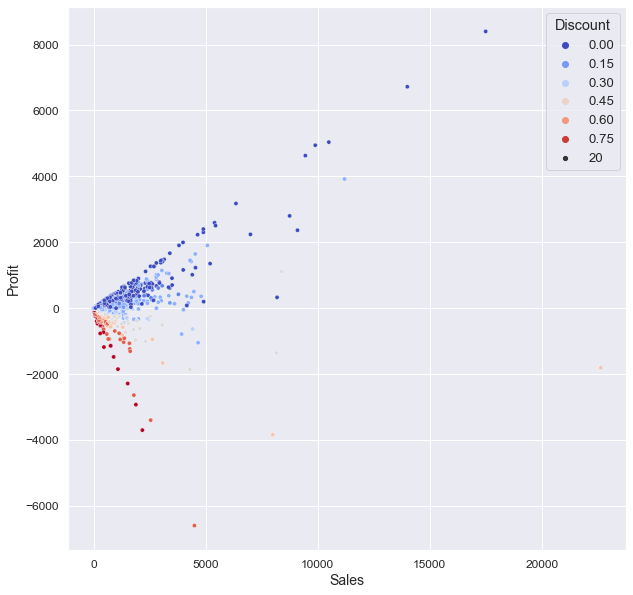

In [4]:
plt.figure(figsize=(10,10))
sns.scatterplot(x="Sales", y="Profit", data=df, hue="Discount", size=20, palette="coolwarm")
plt.show()

## Peer-graded Assignment: Shipping Details

Your company has tasked you with analyzing your company’s shipping status and how many shipments are completed per week. Your task is to create a new calculation and title it “Ship Status.”  This new calculation should show whether the shipment was “Shipped on Time,” “Shipped Early,” or “Shipped Late.”

In [5]:
df = pd.read_csv("Superstore2.csv", parse_dates=["Order Date","Ship Date"])

In [6]:
df.head()

,Category,City,Country,Customer Name,Order Date,Order ID,Postal Code,Product Name,Region,Segment,Ship Date,Ship Mode,State,Sub-Category,Days to Ship Actual,Days to Ship Scheduled,Discount,Number of Records,Profit,Profit Ratio,Quantity,Sales,Sales Forecast,Sales per Customer
0,Office Supplies,Houston,United States,Darren Powers,2011-04-01,CA-2011-103800,77095,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",Central,Consumer,2011-08-01,Standard Class,Texas,Paper,4,6,0.20,1,6,0.34,2,16,22,16.45
1,Office Supplies,Naperville,United States,Phillina Ober,2011-05-01,CA-2011-112326,60540,GBC Standard Plastic Binding Systems Combs,Central,Home Office,2011-09-01,Standard Class,Illinois,Binders,4,6,0.80,1,-5,-1.55,2,4,5,3.54
2,Office Supplies,Naperville,United States,Phillina Ober,2011-05-01,CA-2011-112326,60540,Avery 508,Central,Home Office,2011-09-01,Standard Class,Illinois,Labels,4,6,0.20,1,4,0.36,3,12,15,11.78
3,Office Supplies,Naperville,United States,Phillina Ober,2011-05-01,CA-2011-112326,60540,SAFCO Boltless Steel Shelving,Central,Home Office,2011-09-01,Standard Class,Illinois,Storage,4,6,0.20,1,-65,-0.24,3,273,357,272.74
4,Office Supplies,Philadelphia,United States,Mick Brown,2011-06-01,CA-2011-141817,19143,Avery Hi-Liter EverBold Pen Style Fluorescent ...,East,Consumer,2011-01-13,Standard Class,Pennsylvania,Art,7,6,0.20,1,5,0.25,3,20,26,19.54


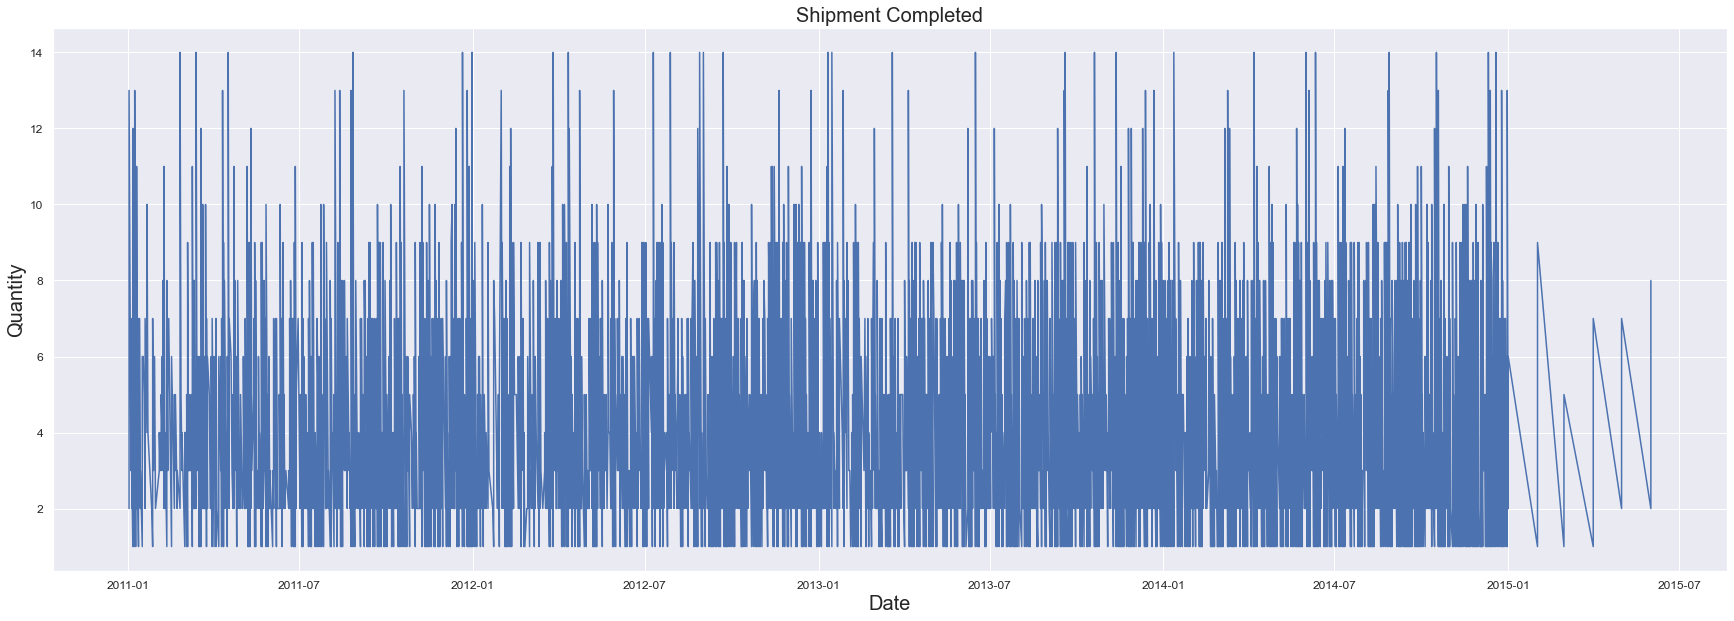

In [7]:
fig = plt.figure(figsize=(30,10))
sns.lineplot(x=df["Ship Date"],y=df.Quantity,data=df, estimator=None)
plt.title("Shipment Completed", fontsize=20)
plt.xlabel("Date", fontsize=20)
plt.ylabel("Quantity", fontsize=20)
#plt.legend(['Quantity'])
plt.show()

## Peer-graded Assignment: Sales Spotlight

Spotlighting is a technique for showing discrete thresholds based on the values of a
measure. You are tasked with creating a table showing total sales by product
category, broken down by Year and Month. 

In [8]:
df = pd.read_csv("Superstore.csv", parse_dates=["Order Date","Ship Date"])

In [9]:
df.head()

,Category,City,Country,Customer Name,Manufacturer,Order Date,Order ID,Postal Code,Product Name,Region,Segment,Ship Date,Ship Mode,State,Sub-Category,Discount,Number of Records,Profit,Profit Ratio,Quantity,Sales
0,Office Supplies,Houston,United States,Darren Powers,Message Book,2011-04-01,CA-2011-103800,77095,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",Central,Consumer,2011-08-01,Standard Class,Texas,Paper,0.20,1,6,0.34,2,16
1,Office Supplies,Naperville,United States,Phillina Ober,GBC,2011-05-01,CA-2011-112326,60540,GBC Standard Plastic Binding Systems Combs,Central,Home Office,2011-09-01,Standard Class,Illinois,Binders,0.80,1,-5,-1.55,2,4
2,Office Supplies,Naperville,United States,Phillina Ober,Avery,2011-05-01,CA-2011-112326,60540,Avery 508,Central,Home Office,2011-09-01,Standard Class,Illinois,Labels,0.20,1,4,0.36,3,12
3,Office Supplies,Naperville,United States,Phillina Ober,SAFCO,2011-05-01,CA-2011-112326,60540,SAFCO Boltless Steel Shelving,Central,Home Office,2011-09-01,Standard Class,Illinois,Storage,0.20,1,-65,-0.24,3,273
4,Office Supplies,Philadelphia,United States,Mick Brown,Avery,2011-06-01,CA-2011-141817,19143,Avery Hi-Liter EverBold Pen Style Fluorescent ...,East,Consumer,2011-01-13,Standard Class,Pennsylvania,Art,0.20,1,5,0.25,3,20


In [10]:
df["Year"] = df["Order Date"].dt.year

In [11]:
df["Month"] = df["Order Date"].dt.month

In [12]:
df.head()

,Category,City,Country,Customer Name,Manufacturer,Order Date,Order ID,Postal Code,Product Name,Region,Segment,Ship Date,Ship Mode,State,Sub-Category,Discount,Number of Records,Profit,Profit Ratio,Quantity,Sales,Year,Month
0,Office Supplies,Houston,United States,Darren Powers,Message Book,2011-04-01,CA-2011-103800,77095,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",Central,Consumer,2011-08-01,Standard Class,Texas,Paper,0.20,1,6,0.34,2,16,2011,4
1,Office Supplies,Naperville,United States,Phillina Ober,GBC,2011-05-01,CA-2011-112326,60540,GBC Standard Plastic Binding Systems Combs,Central,Home Office,2011-09-01,Standard Class,Illinois,Binders,0.80,1,-5,-1.55,2,4,2011,5
2,Office Supplies,Naperville,United States,Phillina Ober,Avery,2011-05-01,CA-2011-112326,60540,Avery 508,Central,Home Office,2011-09-01,Standard Class,Illinois,Labels,0.20,1,4,0.36,3,12,2011,5
3,Office Supplies,Naperville,United States,Phillina Ober,SAFCO,2011-05-01,CA-2011-112326,60540,SAFCO Boltless Steel Shelving,Central,Home Office,2011-09-01,Standard Class,Illinois,Storage,0.20,1,-65,-0.24,3,273,2011,5
4,Office Supplies,Philadelphia,United States,Mick Brown,Avery,2011-06-01,CA-2011-141817,19143,Avery Hi-Liter EverBold Pen Style Fluorescent ...,East,Consumer,2011-01-13,Standard Class,Pennsylvania,Art,0.20,1,5,0.25,3,20,2011,6


In [13]:
df.groupby(["Category"])["Sales"].sum()

Category
Furniture          742006
Office Supplies    719127
Technology         836221
Name: Sales, dtype: int64

In [14]:
df.groupby(["Year"])["Sales"].sum()

Year
2011    484255
2012    470560
2013    608523
2014    734016
Name: Sales, dtype: int64

In [15]:
df.groupby(["Month"])["Sales"].sum()

Month
1     137611
2     120385
3     237494
4     154318
5     175246
6     146114
7     149374
8     207783
9     266134
10    177769
11    271481
12    253645
Name: Sales, dtype: int64

In [16]:
table = pd.pivot_table(data=df, values="Sales", index=["Category","Year","Month"], aggfunc='sum')

In [17]:
table

Sales
Category   Year Month       
Furniture  2011 1      12108
                2       1869
                3      14411
                4       6825
                5       5856
...                      ...
Technology 2014 8      22558
                9      23706
                10     29308
                11     33894
                12     13020

[144 rows x 1 columns]

## Peer-graded Assignment: Dual Layer Maps

#### Python code done by Dennis Lam